E-commerce Sales Forecasting

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
df = pd.read_csv('ecommerce_sales_data.csv')

In [22]:
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [23]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

df_cleaned = df[df['Status'].str.lower() != 'cancelled'] # Remove transactions that were cancelled. These don't contribute to actual sales

df_cleaned.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,2025-03-10,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
5,ORD0006,2025-03-14,T-Shirt,Clothing,20,1,20,John Doe,Dallas,Credit Card,Pending
6,ORD0007,2025-03-18,Smartwatch,Electronics,150,4,600,Emma Clark,Houston,PayPal,Completed


In [24]:
missing_values = df_cleaned.isnull().sum()
print(missing_values)

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64


In [25]:
duplicates = df_cleaned[df_cleaned.duplicated()]
print(f"duplicates found: {len(duplicates)}")
display(duplicates)

duplicates found: 0


,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status


In [26]:
df_cleaned.dtypes

,0
Order ID,object
Date,datetime64[ns]
Product,object
Category,object
Price,int64
Quantity,int64
Total Sales,int64
Customer Name,object
Customer Location,object
Payment Method,object


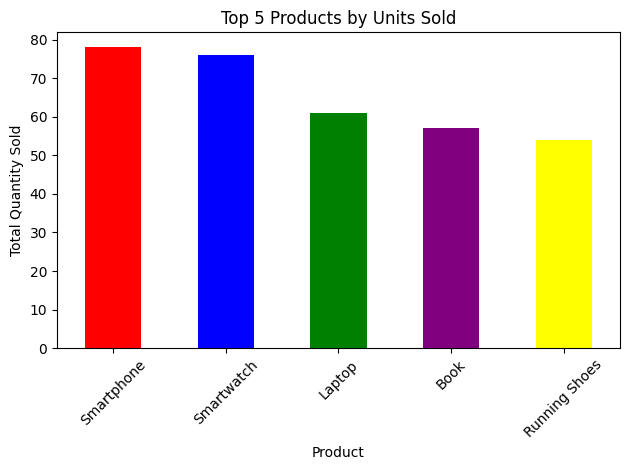

In [27]:
top_products = df_cleaned.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5) #sorts largest to smallest

top_products.plot(kind='bar', title='Top 5 Products by Units Sold', color= ['red','blue','green','purple','yellow'])
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

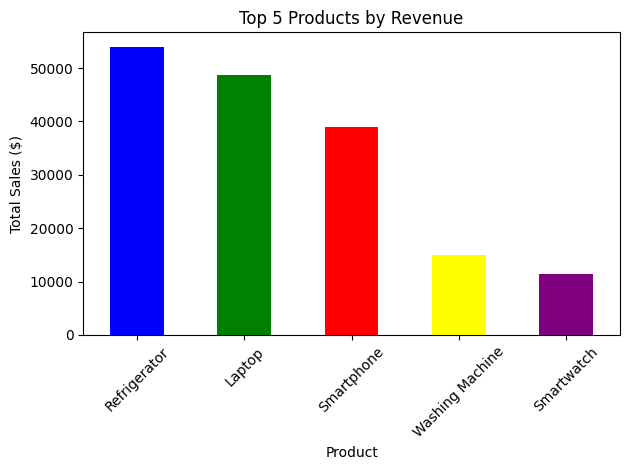

In [28]:
top_sales = df_cleaned.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(5)

top_sales.plot(kind='bar', title='Top 5 Products by Revenue',color= ['blue','green','red','yellow','purple'])
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

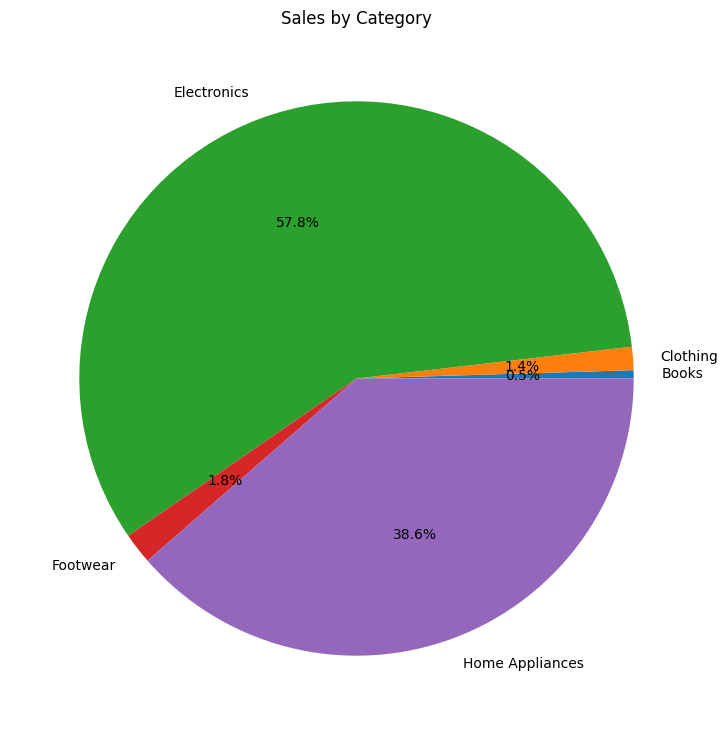

In [29]:
category_sales = df_cleaned.groupby('Category')['Total Sales'].sum()
plt.figure(figsize=(10, 9))
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Category')
plt.ylabel('')
plt.show()

In [30]:
df_drop = df_cleaned.drop(columns=['Order ID', 'Date', 'Product', 'Customer Name', 'Customer Location', 'Status'])
df_encoded = pd.get_dummies(df_drop, columns=['Category', 'Payment Method'], drop_first=True)

In [31]:
# Linear regression model
X = df_encoded.drop(['Total Sales'], axis=1) #sets X as all features except for taregt varables
y = df_encoded['Total Sales'] #set y as target variable

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R²: 0.8575342305850414
Linear Regression RMSE: 591.3001313524969


In [32]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R²: 0.9314735345514505
Random Forest RMSE: 410.09254783001643


In [33]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R² Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_rf))]
})

print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
               Model  R² Score        RMSE
0  Linear Regression  0.857534  591.300131
1      Random Forest  0.931474  410.092548


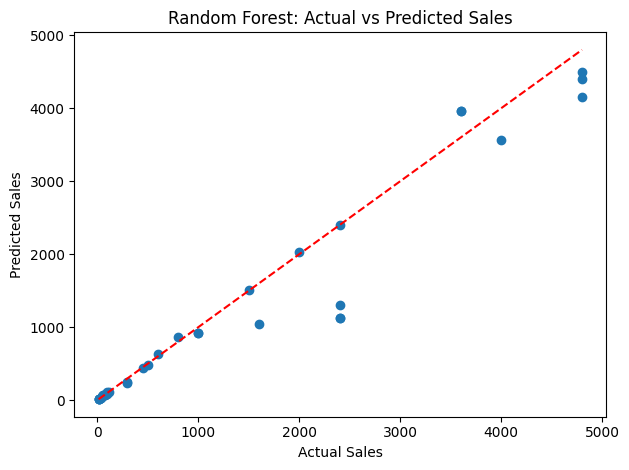

In [34]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.tight_layout()
plt.show()